## MIP

Step 1: Solving root relaxation (continuous problem)
Root relaxation objective: 11.500000
Root solution: [4.41996831e-10 6.28249789e-09 2.00000000e+00 4.99999999e-01]

Starting branch and bound process:

Step 2: Exploring node S0
  Branching on variable x_4 with value 0.500000
  Creating two branches: x_4 ≤ 0 and x_4 ≥ 1
  S1 relaxation objective: 10.500000
  S1 solution: [2.34547440e-10 4.29042723e-10 1.50000000e+00 9.87950288e-12]
  S2 relaxation objective: 9.000000
  S2 solution: [3.74607140e-10 7.58122976e-09 2.00000000e+00 9.99999998e-01]
  Found new best integer solution with objective 9.000000

Step 3: Exploring node S1
  Branching on variable x_3 with value 1.500000
  Creating two branches: x_3 ≤ 1 and x_3 ≥ 2
  S3 relaxation objective: 7.000000
  S3 solution: [ 1.81128910e-13  6.48071634e-10  1.00000000e+00 -1.17886828e-10]
  S4 is infeasible

Branch and bound completed!
Nodes explored: 2
Optimal objective: 9.000000
Optimal solution: [3.74607140e-10 7.58122976e-09 2.00000000e+

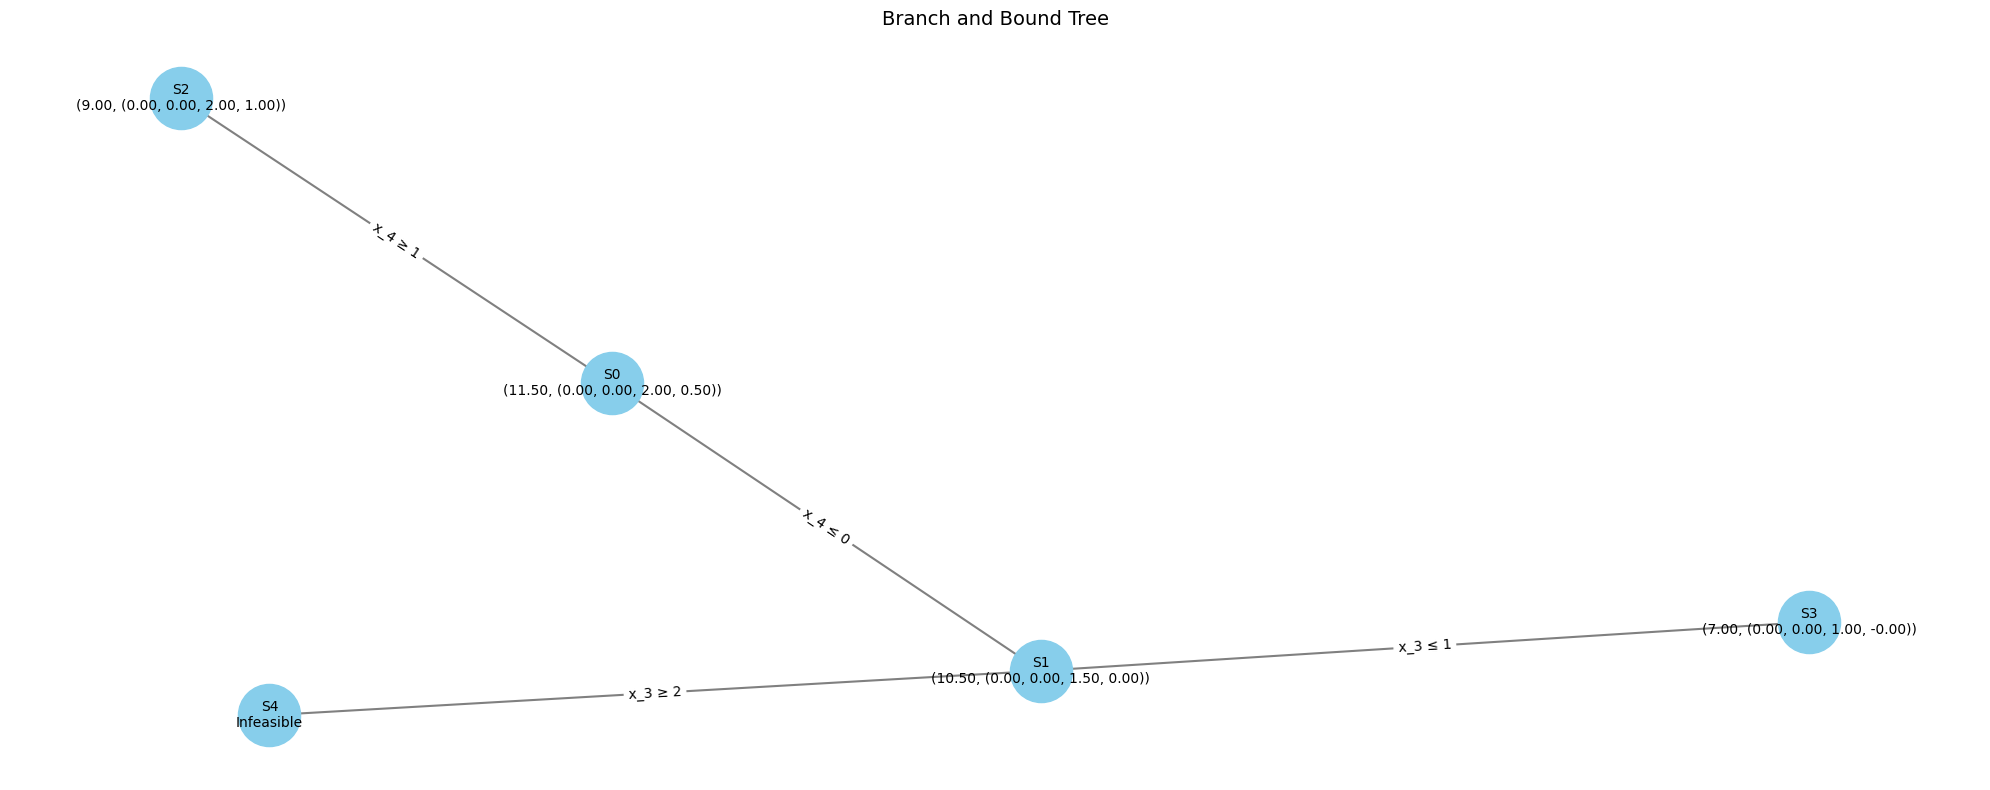


Validation with CVXPY's integer solver:
CVXPY integer optimizer objective: 9.0
CVXPY integer optimizer solution: [-0. -0.  2.  1.]

Continuous solution for comparison:
Optimal continuous objective value: 11.499999988735462
Optimal continuous solution: [4.41996831e-10 6.28249789e-09 2.00000000e+00 4.99999999e-01]


In [ ]:
import cvxpy as cp
import numpy as np
from functions.BranchAndBoundSolver import BranchAndBoundSolver

# Example using the Branch and Bound solver
if __name__ == "__main__":
    # Set up the problem data
    c = np.array([-4, -2, 7, -5])  # Objective coefficients
    A = np.array([
        [1, 0, 5, 0],
        [1, 1, -1, 0],
        [6, -5, 0, 0],
        [-1, 0, 2, -2],
    ])
    b = np.array([10, 1, 0, 3])
    
    # Create and run the solver
    solver = BranchAndBoundSolver(c, A, b, integer_vars=[0, 1, 2, 3], maximize=True)
    solution, objective = solver.solve(verbose=True)
    
    # Compare with CVXPY's integer solver (for validation)
    print("\nValidation with CVXPY's integer solver:")
    x = cp.Variable(4, integer=True)
    objective_fn = cp.Maximize(c @ x)
    constraints = [A @ x <= b, x >= 0]
    int_prob = cp.Problem(objective_fn, constraints)
    int_result = int_prob.solve()
    
    print(f"CVXPY integer optimizer objective: {int_result}")
    print(f"CVXPY integer optimizer solution: {x.value}")
    
    # Compare with continuous solution
    print("\nContinuous solution for comparison:")
    x_cont = cp.Variable(4)
    objective_cont = cp.Maximize(c @ x_cont)
    constraints_cont = [A @ x_cont <= b, x_cont >= 0]
    cont_prob = cp.Problem(objective_cont, constraints_cont)
    cont_result = cont_prob.solve()
    
    print(f"Optimal continuous objective value: {cont_result}")
    print(f"Optimal continuous solution: {x_cont.value}")

## BIP

Step 1: Solving root relaxation (continuous problem)
Root relaxation objective: 66.000000
Root solution: [9.99999997e-01 9.99999997e-01 9.99999998e-01 1.99999992e-01
 1.05312628e-08]

Starting branch and bound process:

Step 2: Exploring node S0
  Branching on binary variable x_4 with value 0.200000
  Creating two branches: x_4 = 0 and x_4 = 1
  S1 relaxation objective: 65.833333
  S1 solution: [9.99999999e-01 9.99999999e-01 9.99999999e-01 3.51358697e-11
 1.66666668e-01]
  S2 relaxation objective: 65.000000
  S2 solution: [9.99999998e-01 2.46970164e-09 9.99999998e-01 1.00000000e+00
 3.28711590e-10]
  Found new best integer solution with objective 65.000000

Step 3: Exploring node S1
  Branching on binary variable x_5 with value 0.166667
  Creating two branches: x_5 = 0 and x_5 = 1
  S3 relaxation objective: 60.000000
  S3 solution: [1.00000000e+00 1.00000000e+00 1.00000000e+00 3.96218586e-11
 3.44760560e-11]
  S4 relaxation objective: 63.333333
  S4 solution: [ 9.99999985e-01  6.217917

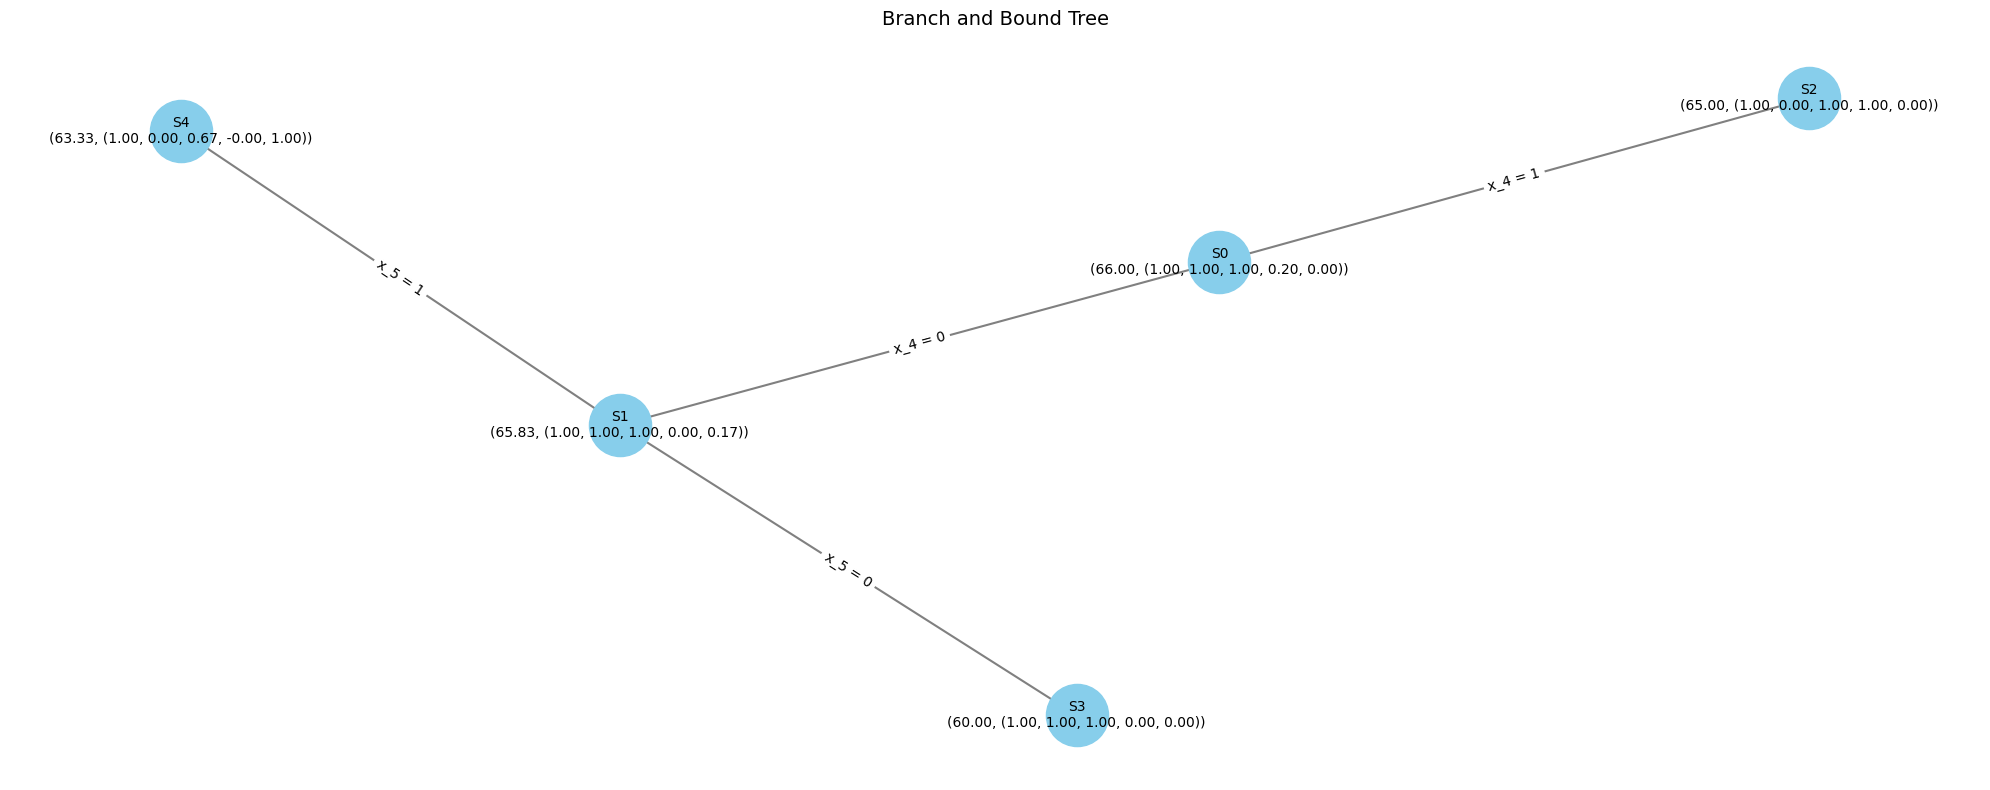


Validation with CVXPY's integer solver:
CVXPY integer optimizer objective: 65.0
CVXPY integer optimizer solution: [1. 0. 1. 1. 0.]

Continuous solution for comparison:
Optimal continuous objective value: 65.99999997918597
Optimal continuous solution: [9.99999997e-01 9.99999997e-01 9.99999998e-01 1.99999992e-01
 1.05312629e-08]


In [ ]:
import cvxpy as cp
import numpy as np
from functions.BranchAndBoundSolver import BranchAndBoundSolver

# Example using the Branch and Bound solver on the provided problem
if __name__ == "__main__":
    # Set up the problem data
    c = np.array([15, 25, 20, 30, 35])  # Objective coefficients
    A = np.array([
        [10, 20, 15, 25, 30],  # Constraint coefficients
    ])
    b = np.array([50])  # Constraint right-hand side

    # Create and run the solver
    solver = BranchAndBoundSolver(c, A, b, 
                                  binary_vars=[0, 1, 2, 3, 4],  # Make all variables binary
                                  maximize=True)
    solution, objective = solver.solve(verbose=True)
    
    # Compare with CVXPY's integer solver (for validation)
    print("\nValidation with CVXPY's integer solver:")
    x_cvx = cp.Variable(5, boolean=True)  # Fix: Change dimension to 5 to match c
    objective_fn = cp.Maximize(c @ x_cvx)
    constraints = [A @ x_cvx <= b]
    int_prob = cp.Problem(objective_fn, constraints)
    int_result = int_prob.solve()
    
    print(f"CVXPY integer optimizer objective: {int_result}")
    print(f"CVXPY integer optimizer solution: {x_cvx.value}")
    
    # Compare with continuous solution
    print("\nContinuous solution for comparison:")
    x_cont = cp.Variable(5)  # Fix: Change dimension to 5 to match c
    objective_cont = cp.Maximize(c @ x_cont)
    constraints_cont = [A @ x_cont <= b, x_cont >= 0, x_cont <= 1]  # Box constraints
    cont_prob = cp.Problem(objective_cont, constraints_cont)
    cont_result = cont_prob.solve()
    
    print(f"Optimal continuous objective value: {cont_result}")
    print(f"Optimal continuous solution: {x_cont.value}")